# **Final Project 4**

> Group 2
1.   Farisa Fikri Mumtaza (PYTN-KS20-03)
2.   Ilham Yusuf (PYTN-KS20-06)
3.   Ditha Tul Nugraha (PYTN-KS20-015)


## **1. Perkenalan**

### 1.1 Latar Belakang

Keberhasilan suatu perusahaan sangat tergantung pada keberhasilan strategi pemasaran, yang menjadi landasan untuk meningkatkan visibilitas, menarik perhatian pelanggan potensial, dan merangsang aktivitas pembelian. Strategi pemasaran yang efektif bukan hanya suatu keharusan dalam menghadapi persaingan ketat, tetapi juga kunci utama untuk mencapai pertumbuhan dan keberlanjutan bisnis. Keberhasilan strategi pemasaran sendiri sangat bergantung pada pemahaman yang mendalam tentang pasar dan segmentasi yang relevan.

### 1.2 Dataset

Dataset yang digunakan dalam proyek ini berasal dari Credit Card Dataset for Clustering, diambil dari Kaggle. Dataset ini mencakup informasi mengenai transaksi pengguna kartu kredit dari 9000 orang selama periode 6 bulan, dengan total 18 atribut yang berbeda.

### 1.3 Objektif

● Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn

● Mampu mempersiapkan data untuk digunakan dalam Clustering

● Mampu mengimplementasikan Clustering pada data yang diberikan

## **2. Import pustaka yang dibutuhkan**

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings
from scipy import stats
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings("ignore")

## **3. Data Loading**

### 3.1 Proses Data Loading

In [2]:
# Mentransformasikan file yang ada di google drive
! gdown --id 1c7uyVyduYf26W_VFrQZsrCPUGbFJq_Jd

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1c7uyVyduYf26W_VFrQZsrCPUGbFJq_Jd
To: /content/CC GENERAL.csv
100% 894k/894k [00:00<00:00, 7.93MB/s]


In [3]:
# Membaca dataset
dataset_path = '/content/CC GENERAL.csv'
data = pd.read_csv(dataset_path)
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


### 3.2 Eksplorasi Sederhana

In [4]:
# Menampilkan informasi tiap kolom pada dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Tipe data pada dataset ini antara lain berbentuk object, float, dan integer.

In [5]:
# Melihat bentuk dari dataset
data.shape

(8950, 18)

Dataset ini terdiri dari 8950 baris dan 18 kolom

In [6]:
# Melihat lima data teratas
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
# Melihat lima data terbawah
data.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [8]:
#Menampilkan rangkuman statistik deskriptif (jumlah, rata-rata, standar deviasi, nilai minimum, kuatil, nilai maksimum tiap kolom)
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [9]:
# Menampilkan nama kolom pada dataset
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

## **4. Data Cleaning**


> Proses cleaning dapat berupa
memberi nama baru untuk setiap kolom, mengisi missing values,
menghapus kolom yang tidak dipakai, dan lain sebagainya



### 4.1 Missing Values

In [10]:
# Mengecek missing values pada dataset
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Atribut credit_limit dan minimum_payments masih memiliki missing values.

In [11]:
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean(),inplace=True)
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(),inplace=True)

In [12]:
# Mengecek kembali missing values pada dataset
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Sudah tidak ada missing values

In [13]:
# Mengecek data yang duplikat
data.duplicated().sum()

0

Tidak ada data yang duplikay

### 4.2 Mengganti Nama

In [14]:
# Mengganti nama menjadi bahasa indonesia agar mudah dimengerti
data = data.rename(columns={'CUST_ID':'ID_PELANGGAN',
    'BALANCE':'SALDO',
    'BALANCE_FREQUENCY' : 'FREKUENSI_SALDO',
    'PURCHASES' : 'PEMBELIAN',
    'ONEOFF_PURCHASES':'PEMBELIAN_SEKALI',
    'INSTALLMENTS_PURCHASES':'PEMBELIAN_ANGSURAN',
    'CASH_ADVANCE':'PENARIKAN_TUNAI',
    'PURCHASES_FREQUENCY':'FREKUENSI_PEMBELIAN',
    'ONEOFF_PURCHASES_FREQUENCY':'FREKUENSI_PEMBELIAN_SEKALI',
    'PURCHASES_INSTALLMENTS_FREQUENCY':'FREKUENSI_PEMBELIAN_ANGSURAN',
    'CASH_ADVANCE_FREQUENCY':'FREKUENSI_PENARIKAN_TUNAI',
    'CASH_ADVANCE_TRX':'TRANSAKSI_PENARIKAN_TUNAI',
    'PURCHASES_TRX':'TRANSAKSI_PEMBELIAN',
    'CREDIT_LIMIT':'BATAS_KREDIT',
    'PAYMENTS':'PEMBAYARAN',
    'MINIMUM_PAYMENTS':'PEMBAYARAN_MINIMAL',
    'PRC_FULL_PAYMENT':'PEMBAYARAN_PENUH',
    'TENURE':'MASA_PENGGUNAAN'})
data

,ID_PELANGGAN,SALDO,FREKUENSI_SALDO,PEMBELIAN,PEMBELIAN_SEKALI,PEMBELIAN_ANGSURAN,PENARIKAN_TUNAI,FREKUENSI_PEMBELIAN,FREKUENSI_PEMBELIAN_SEKALI,FREKUENSI_PEMBELIAN_ANGSURAN,FREKUENSI_PENARIKAN_TUNAI,TRANSAKSI_PENARIKAN_TUNAI,TRANSAKSI_PEMBELIAN,BATAS_KREDIT,PEMBAYARAN,PEMBAYARAN_MINIMAL,PEMBAYARAN_PENUH,MASA_PENGGUNAAN
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


Keternagan kolom :
1. ID_PELANGGAN: Identifikasi unik untuk setiap pelanggan.
2. JUMLAH_SALDO: Jumlah saldo pada akun pelanggan.
3. FREKUENSI_SALDO: Frekuensi pembaruan saldo oleh pelanggan. (1 = sering diperbarui , 0 = tidak sering diperbarui)
4. PEMBELIAN: Jumlah pembelian yang dilakukan pelanggan.
5. PEMBELIAN_SEKALIGUS: Jumlah pembelian sekali transaksi oleh pelanggan.
6. PEMBELIAN_ANGSURAN: Jumlah pembelian dengan pembayaran angsuran oleh pelanggan.
7. PENARIKAN_TUNAI: Jumlah uang yang ditarik tunai oleh pelanggan.
8. FREKUENSI_PEMBELIAN: Frekuensi pembelian oleh pelanggan.(1 = sering dibeli, 0 = tidak sering dibeli)
9. FREKUENSI_PEMBELIAN_SEKALIGUS: Frekuensi pembelian sekali transaksi oleh pelanggan.(1 = sering dibeli, 0 = tidak sering dibeli)
10. FREKUENSI_PEMBELIAN_ANGSURAN: Frekuensi pembelian dengan pembayaran angsuran oleh pelanggan.(1 = sering dilakukan, 0 = tidak sering dilakukan)
11. FREKUENSI_PENARIKAN_TUNAI: Frekuensi penarikan tunai oleh pelanggan.(1 = sering dilakukan, 0 = tidak sering dilakukan)
12. TRANSAKSI_PENARIKAN_TUNAI: Jumlah transaksi penarikan tunai oleh pelanggan.
13. TRANSAKSI_PEMBELIAN: Jumlah transaksi pembelian oleh pelanggan.
14. BATAS_KREDIT: Batas kredit yang diberikan kepada pelanggan.
15. PEMBAYARAN: Jumlah pembayaran yang dilakukan oleh pelanggan.
16. PEMBAYARAN_MINIMAL: Jumlah pembayaran minimal yang harus dilakukan pelanggan.
17. PEMBAYARAN_PENUH: Persentase pembayaran penuh yang dilakukan oleh pelanggan.
18. MASA_PENGGUNAAN: Jangka waktu penggunaan atau durasi akun pelanggan.



In [15]:
# Menghapus kolom ID_PELANGGAN
data.drop(columns=["ID_PELANGGAN"], inplace=True)
data.head()

,SALDO,FREKUENSI_SALDO,PEMBELIAN,PEMBELIAN_SEKALI,PEMBELIAN_ANGSURAN,PENARIKAN_TUNAI,FREKUENSI_PEMBELIAN,FREKUENSI_PEMBELIAN_SEKALI,FREKUENSI_PEMBELIAN_ANGSURAN,FREKUENSI_PENARIKAN_TUNAI,TRANSAKSI_PENARIKAN_TUNAI,TRANSAKSI_PEMBELIAN,BATAS_KREDIT,PEMBAYARAN,PEMBAYARAN_MINIMAL,PEMBAYARAN_PENUH,MASA_PENGGUNAAN
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [16]:
#Mengecek kembali bentuk dataset setelah dilakukan data cleaning
data.shape

(8950, 17)

Terjadi pengurangan baris dan kolom menjadi 8950 baris dan 17 kolom

## **5. Explorasi Data**


> Berisi explorasi data pada dataset diatas dengan menggunakan
query, grouping, visualisasi sederhana, dan lain sebagainya.



### 5.1 Visualisasi Sederhana (skewness)

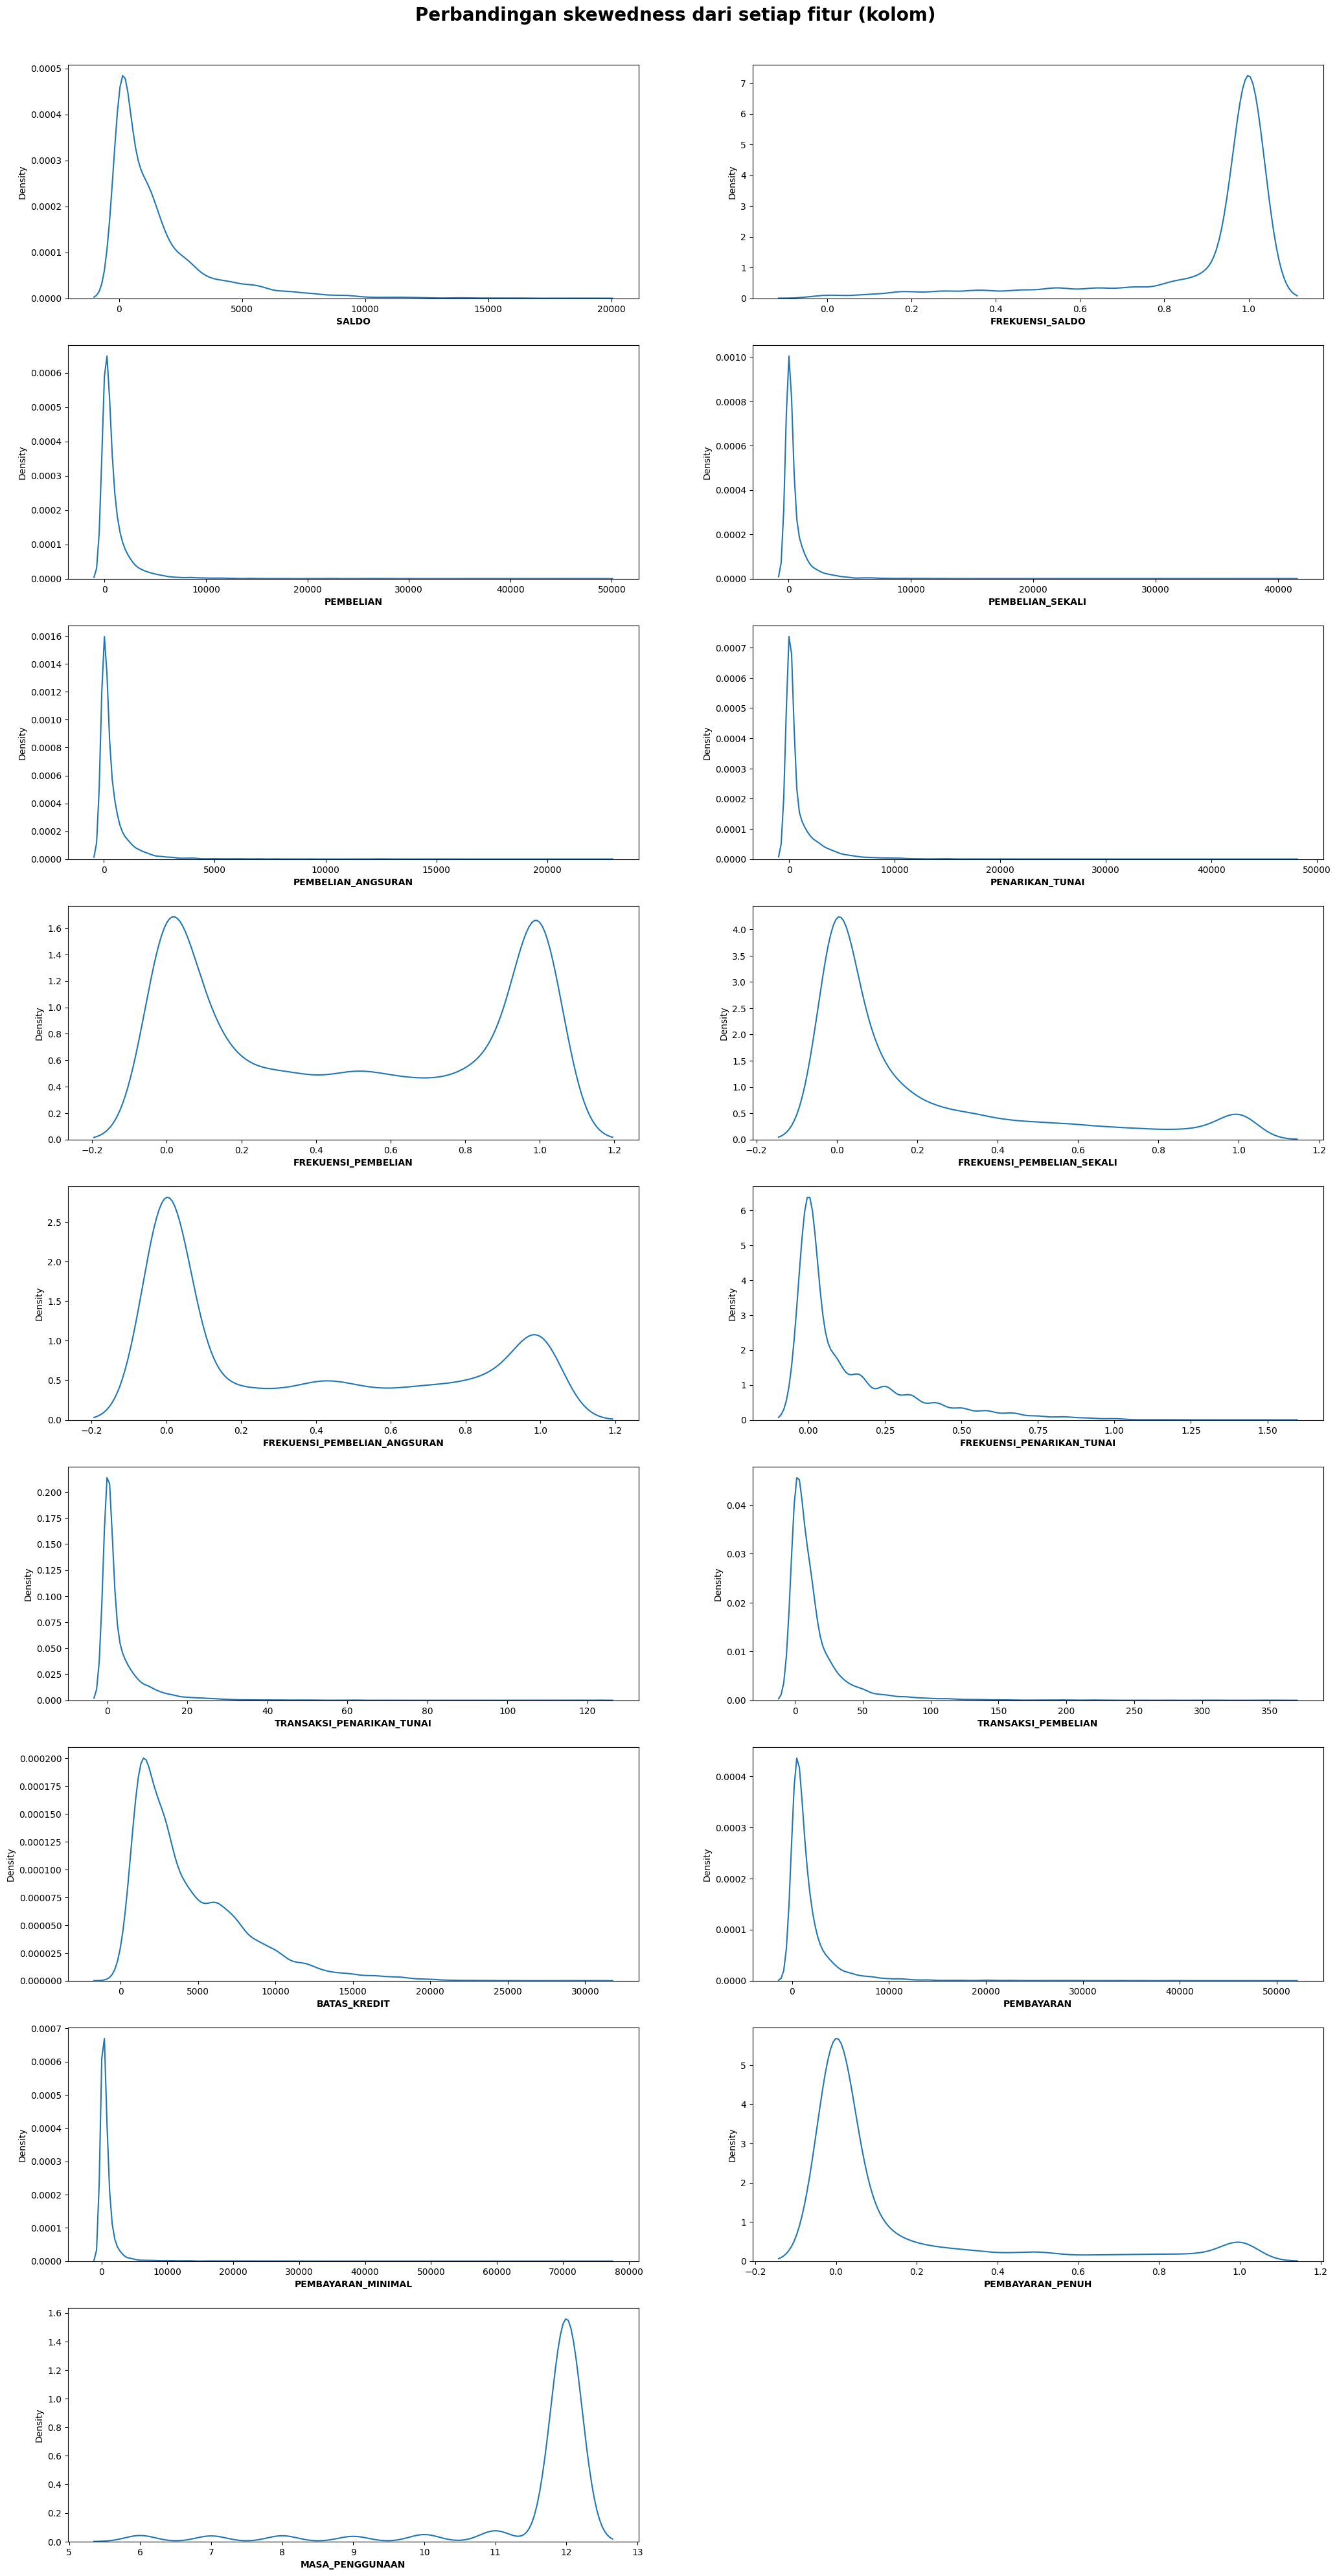

In [17]:
#Membuat perbandingan distribusi (skewedness) dari setiap fitur (kolom) dalam dataset
plt.figure(figsize=(25,45))
plt.suptitle('Perbandingan skewedness dari setiap fitur (kolom)', fontweight='bold', fontsize=20)
plt.subplots_adjust(top=0.96)
for i, col in enumerate(data.columns):
    ax = plt.subplot(9, 2, i+1)
    sns.kdeplot(data[col], ax=ax)
    plt.xlabel(col, fontsize=10, fontweight='bold')
plt.show()

In [18]:
# Menghitung nilai skewness dari setiap kolom
skewness_values = data.skew()
# Menampilkan hasil
print(skewness_values)

SALDO                            2.393386
FREKUENSI_SALDO                 -2.023266
PEMBELIAN                        8.144269
PEMBELIAN_SEKALI                10.045083
PEMBELIAN_ANGSURAN               7.299120
PENARIKAN_TUNAI                  5.166609
FREKUENSI_PEMBELIAN              0.060164
FREKUENSI_PEMBELIAN_SEKALI       1.535613
FREKUENSI_PEMBELIAN_ANGSURAN     0.509201
FREKUENSI_PENARIKAN_TUNAI        1.828686
TRANSAKSI_PENARIKAN_TUNAI        5.721298
TRANSAKSI_PEMBELIAN              4.630655
BATAS_KREDIT                     1.522549
PEMBAYARAN                       5.907620
PEMBAYARAN_MINIMAL              13.867357
PEMBAYARAN_PENUH                 1.942820
MASA_PENGGUNAAN                 -2.943017
dtype: float64



Secara umum, berdasarkan nilai skewness pada variabel-variabel dalam dataset dapat diambil kesimpulan :
*   Sebagian besar variabel menunjukkan kecenderungan distribusi yang miring ke kanan (skewness positif), di mana sebagian besar data cenderung berada di nilai yang lebih rendah dengan adanya beberapa nilai ekstrim yang tinggi.
Hal ini menandakan bahwa mayoritas observasi memiliki nilai yang relatif rendah, sementara sejumlah kecil observasi dapat memiliki nilai yang signifikan lebih tinggi.

*   Frekuensi pembelian (FREKUENSI_PEMBELIAN) menunjukkan skewness mendekati 0, menunjukkan adanya distribusi yang cukup simetris.
Tidak terdapat kecenderungan yang signifikan ke kiri atau ke kanan dalam distribusi frekuensi pembelian


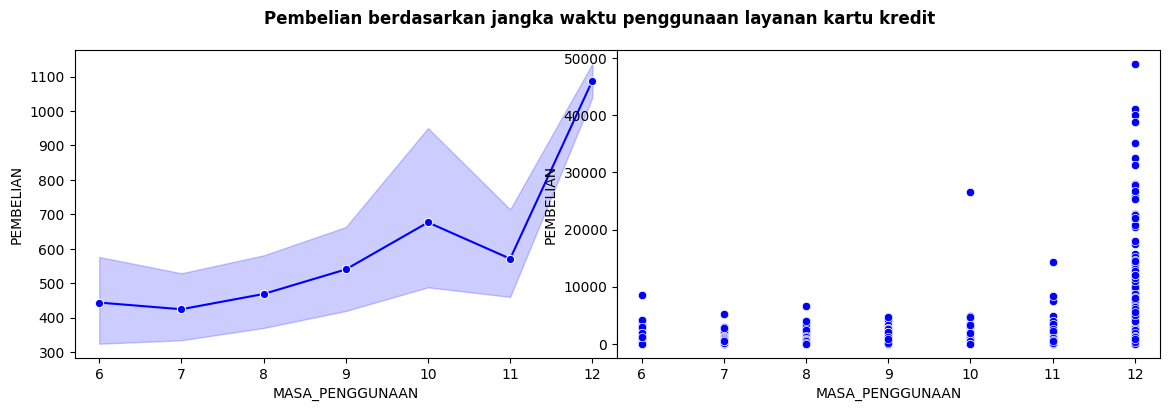

In [19]:
# Pembelian berdasarkan jangka waktu penggunaan layanan kartu kredit
plt.figure(figsize=(14,4))
plt.suptitle('Pembelian berdasarkan jangka waktu penggunaan layanan kartu kredit', fontweight='bold', fontsize=12)

# Line plot
plt.subplot(1,2,1)
sns.lineplot(x='MASA_PENGGUNAAN', y='PEMBELIAN', data=data, color='blue', marker="o")

# Scatter plot
plt.subplot(1,2,2)
sns.scatterplot(x='MASA_PENGGUNAAN', y='PEMBELIAN', data=data, color='blue');

plt.subplots_adjust(wspace=0.)
plt.show()



*   Jumlah pembelian meningkat berdasarkan masa berlaku penggunaan layanan kartu, tetapi sempat menurun pada masa berlaku 11 bulan

*   Jumlah pembelian tertinggi terdapat pada masa berlaku penggunaan layanan kartu kredit selama 12 bulan



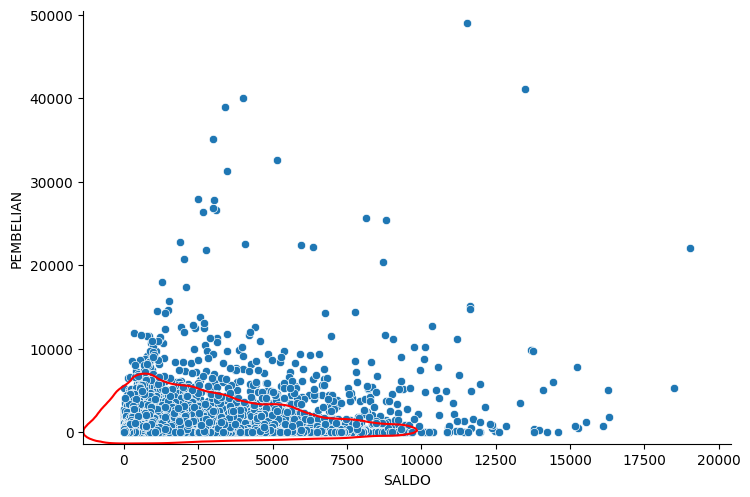

In [20]:
# persebaran pembelian yang dilakukan berdasarkan saldo pelanggan
sns.pairplot(data=data, x_vars='SALDO', y_vars='PEMBELIAN',
             height=5, aspect=1.5).map(sns.kdeplot, levels=1, color='red');

Sebagian besar pengguna yang tersebar telah melakukan pembelian dibawah 8.000 dan saldo yang tersisa di akun mereka untuk melakukan pembelian yaitu dibawah 10.000.

### 5.2 Analisis Korelasi

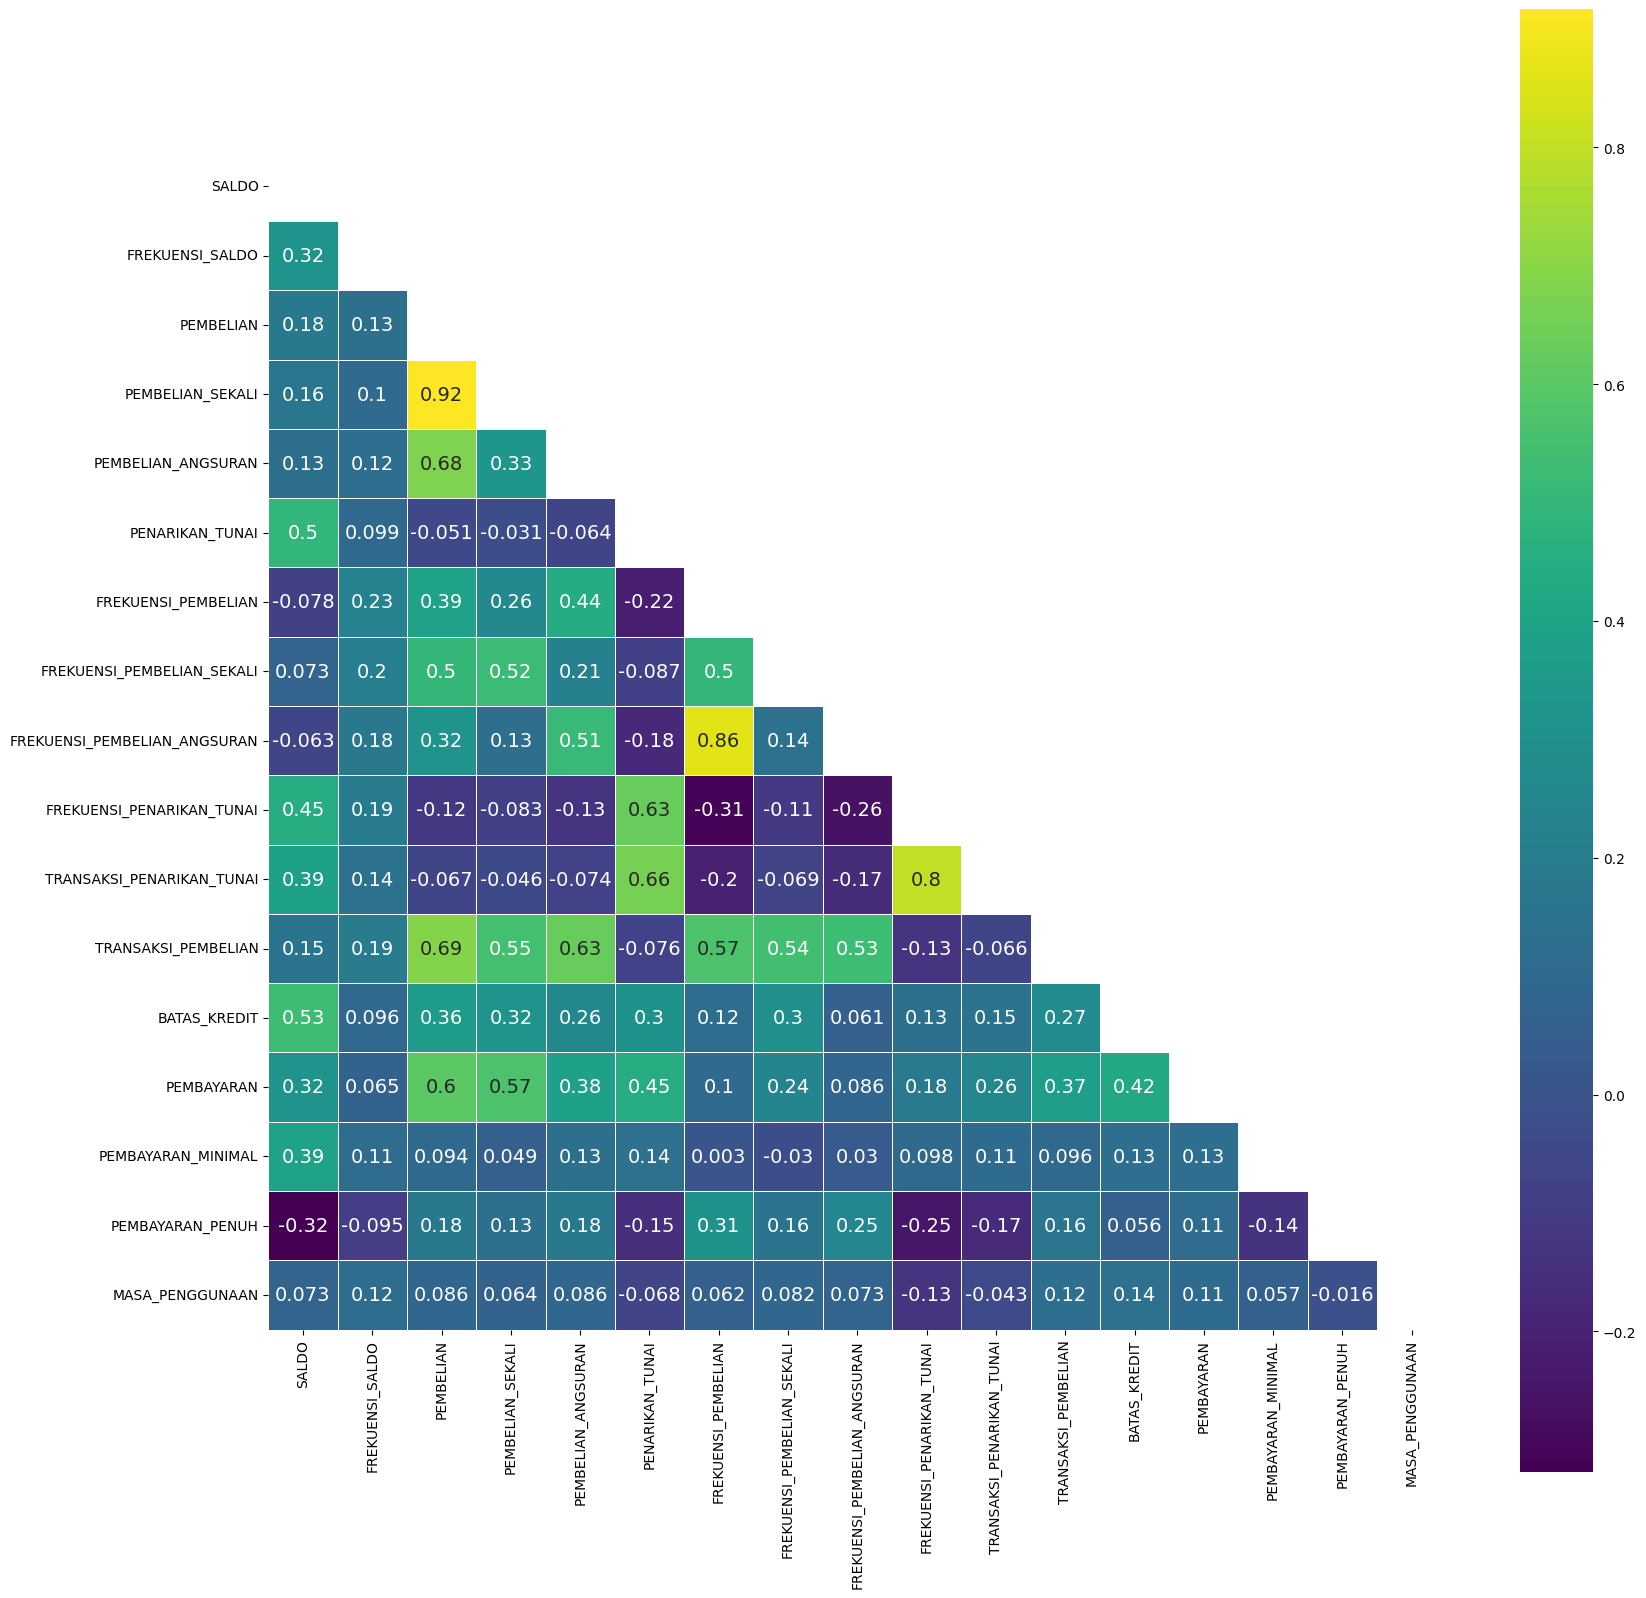

In [21]:
correlation = data.corr(method='pearson')

fig, ax = plt.subplots()
ax.figure.set_size_inches(19, 19)

# Membuat heatmap dalam bentuk segitiga
mask = np.triu(np.ones_like(correlation, dtype=np.bool))

# Membuat heatmap
sns.heatmap(correlation, cmap='viridis', mask=mask, square=True, linewidths=.5,
            annot=True, annot_kws={'size':14});

plt.show()


Kesimpulan :
*   Korelasi kuat
> Rentang: 0.7 hingga 1.0 (atau -0.7 hingga -1.0 untuk korelasi negatif).
> Interpretasi: Hubungan antar variabel sangat kuat. Perubahan dalam satu variabel sangat erat terkait dengan perubahan dalam variabel lainnya.
> **Contoh** :
> 1. Pembelian_Sekali dan Pembelian dengan nilai korelasi 0.92. Artinya, terdapat hubungan positif yang sangat kuat antara jumlah pembelian yang dilakukan sekali (Pembelian_sekali) dan total pembelian keseluruhan. Ini menunjukkan bahwa pelanggan yang melakukan pembelian satu kali cenderung juga melakukan pembelian secara keseluruhan.
> 2. Frekuensi_Pembelian_Angsuran dan Frekuensi_Pembelian dengan nilai korelasi 0.86. Ini menunjukkan bahwa pelanggan yang sering melakukan pembelian angsuran juga cenderung melakukan pembelian secara umum.
> 3. Transaksi_Penarikan_Tunai dan Frekuensi_Penarikan_Tunai dengan nilai korelasi 0.8. Ini menunjukkan bahwa pelanggan yang sering melakukan transaksi penarikan tunai juga cenderung melakukan penarikan tunai secara umum.

*   Korelasi sedang
> Rentang: 0.3 hingga 0.69 (atau -0.3 hingga -0.69 untuk korelasi negatif).
Interpretasi: Hubungan antar variabel memiliki kekuatan yang sedang. Ada hubungan, tetapi tidak sekuat pada korelasi yang kuat.
> **Contoh** :
> 1. Transaksi_Pembelian dan Pembelian dengan nilai korelasi 0.69. Ini menunjukkan bahwa pelanggan yang melakukan banyak transaksi pembelian cenderung memiliki total pembelian yang lebih tinggi.
> 2.Pembelian_Angsuran dan Pembelian dengan nilai korelasi 0.68. Ini mengindikasikan bahwa sebagian besar dari total pembelian melibatkan pembayaran secara mencicil.
> 3. Transaksi_Penarikan_Tunai dan Penarikan_Tunai dengan nilai korelasi 0.66. Ini menunjukkan bahwa pelanggan yang sering melakukan transaksi penarikan tunai cenderung memiliki jumlah penarikan tunai yang lebih tinggi secara keseluruhan.

*   Korelasi lemah
> Rentang: 0.1 hingga 0.29 (atau -0.1 hingga -0.29 untuk korelasi negatif).
Interpretasi: Hubungan antar variabel lemah. Hubungan tersebut mungkin tidak signifikan secara substansial.
> **Contoh** : Frekuensi_Pmebelian dan Frekuensi_Saldo dengan nilai korelasi 0.23

*   Korelai sangat lemah (hampir tidak ada korelasi)
> Rentang: 0.0 hingga 0.09 (atau -0.0 hingga -0.09 untuk korelasi negatif).
Interpretasi: Tidak ada korelasi atau hubungan sangat lemah antar variabel.
> **Contoh** : Transaksi_Pembelian dan Transaksi_Penarikan_Tunai dengan nilai korelasi -0.066. Artinya menunjukkan hubungan yang berlawanan arah yaitu ketika Transaksi_Pembelian meningkat, Transaksi_Penarikan_Tunai cenderung menurun.

### 5.3 Mendeteksi Outlier

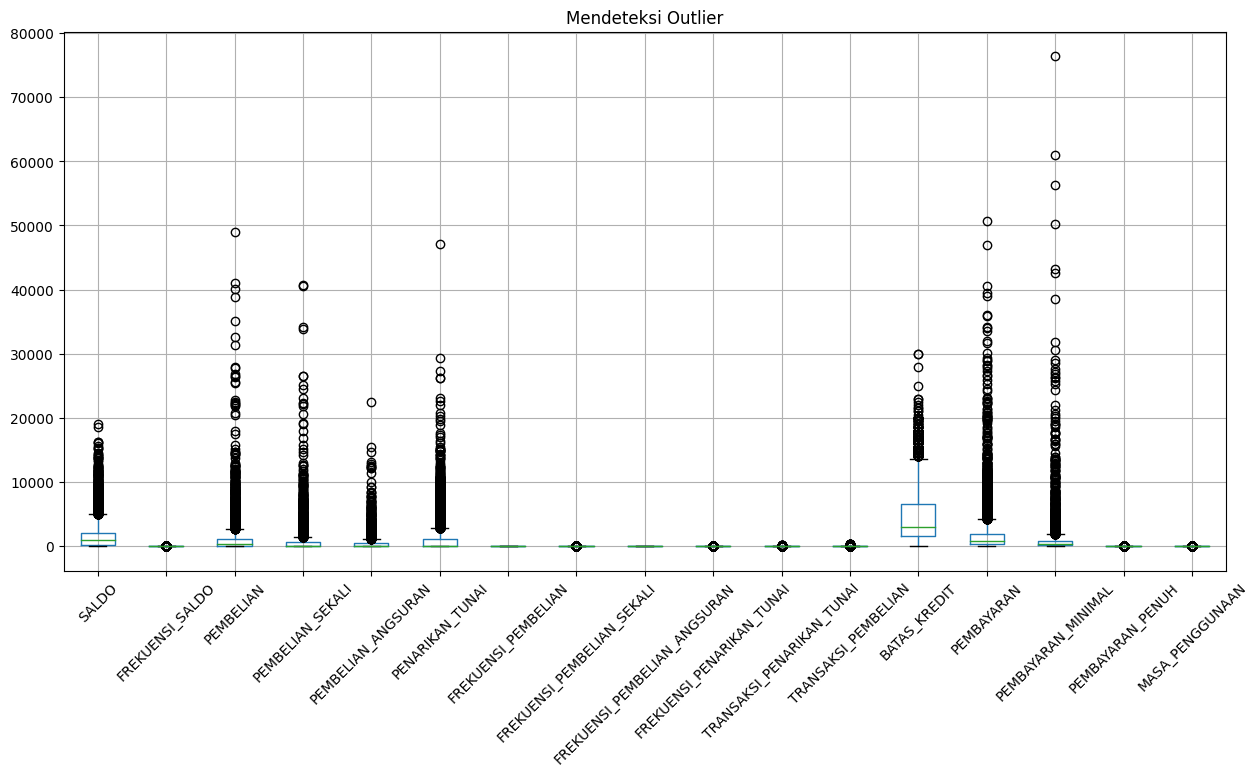

In [22]:
# Mendeteksi outlier
plt.figure(figsize=(15, 7))
data.boxplot()
plt.title('Mendeteksi Outlier')
plt.xticks(rotation=45)
plt.show()

Terlihat banyak outlier pada data maka kita harus menghapus outlier menggunaakn IQR (Interquartile Range) dan Zscore. Karena outlier dapat memengaruhi keakuratan model statistik dan menyebabkan kesalahan interpretasi

**1. Penghapusan Outlier menggunakan IQR**


In [23]:
# Menghitung nilai kuartil pertama (Q1 25%) dan kuartil ketiga (Q3 75%)
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)

# Menghitung rentang IQR (Interquartile Range) melalui selisih
iqr = q3 - q1

# Menentukan batas ambang untuk outlier
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identifikasi data yang di luar batas ambang sebagai outlier
outlier = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]
#((data < lower_bound) | (data > upper_bound)).any(axis=1) menghasilkan datafrmae boolean yang menunjukkan apakah setiap baris berisi outlier atau tidak.
# ~ menggantikan nilai boolean sehingga outlier menjadi True dan nilai lainnya menjadi False.
# data[...] digunakan untuk mengindeks dataframe dan mengambil baris-baris yang termasuk outlier.

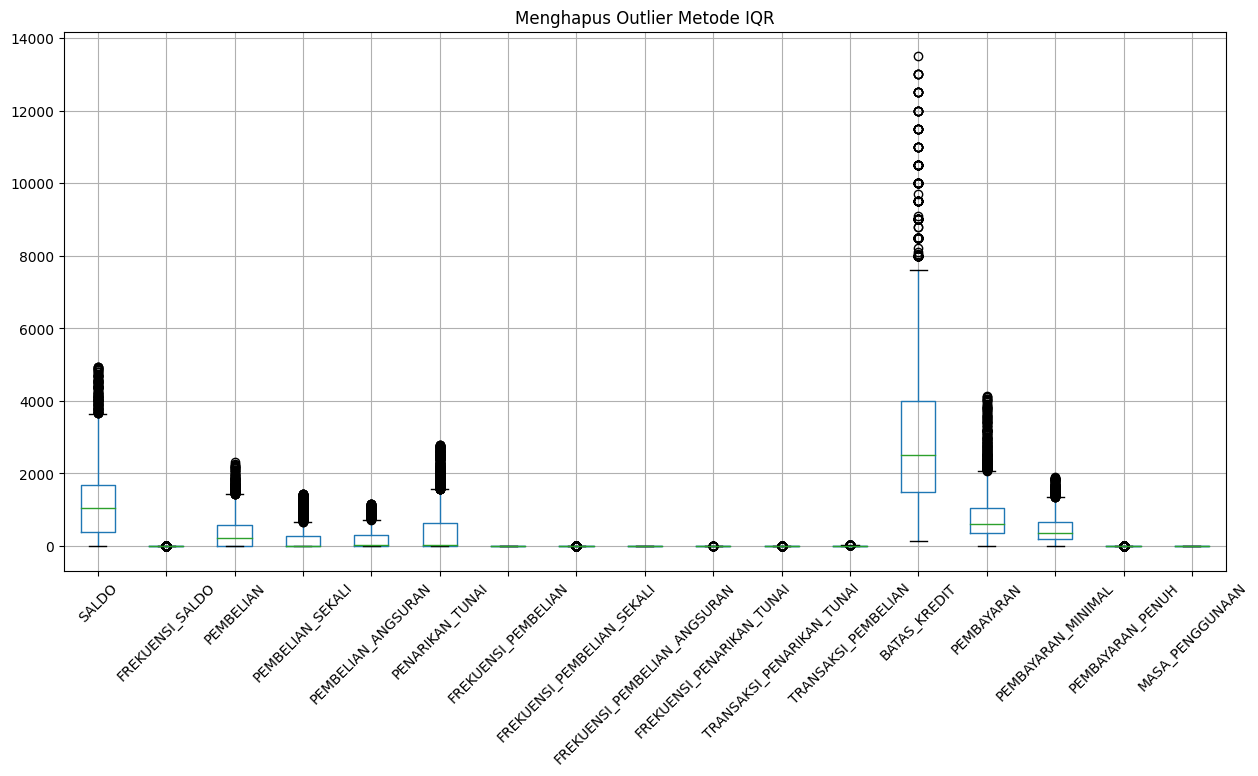

In [24]:
# Membuat boxplot setelah menghapus outlier
plt.figure(figsize=(15, 7))
outlier.boxplot()
plt.title('Menghapus Outlier Metode IQR')
plt.xticks(rotation=45)
plt.show()

In [25]:
# Menampilkan ukuran DataFrame sebelum dan sesudah penghapusan outlier
print("Data frame Sebelum Outlier di hapus menggunakan metode IQR : ", data.shape)
print("Data frame Sesudah Outlier di hapus menggunakan metode IQR : ", outlier.shape)

Data frame Sebelum Outlier di hapus menggunakan metode IQR :  (8950, 17)
Data frame Sesudah Outlier di hapus menggunakan metode IQR :  (3008, 17)


In [26]:
# Jumlah baris sebelum dan sesudah outlier dihapus
jumlah_sebelum = 8950
jumlah_sesudah = 3008

# Menghitung selisih jumlah baris dan persentase terhapus
selisih = jumlah_sebelum - jumlah_sesudah
persentase_terhapus = (selisih / jumlah_sebelum) * 100

# Menampilkan hasil
print(f"Selisih jumlah baris: {selisih}")
print(f"Persentase data yang terhapus: {persentase_terhapus:.2f}%")

Selisih jumlah baris: 5942
Persentase data yang terhapus: 66.39%


**2. Penghapusan Outlier menggunakan ZScore**

In [27]:
# Menghitung Z-score untuk setiap kolom
z_scores = data.apply(lambda x: (x - x.mean()) / x.std())

# Menentukan ambang batas Z-score untuk mengidentifikasi outlier
z_score_threshold = 3

# Mengidentifikasi outlier berdasarkan Z-score
outliers = data[z_scores.abs() > z_score_threshold]

# Menghapus outlier
data_zsc = data[(np.abs(z_scores) <= z_score_threshold).all(axis=1)]

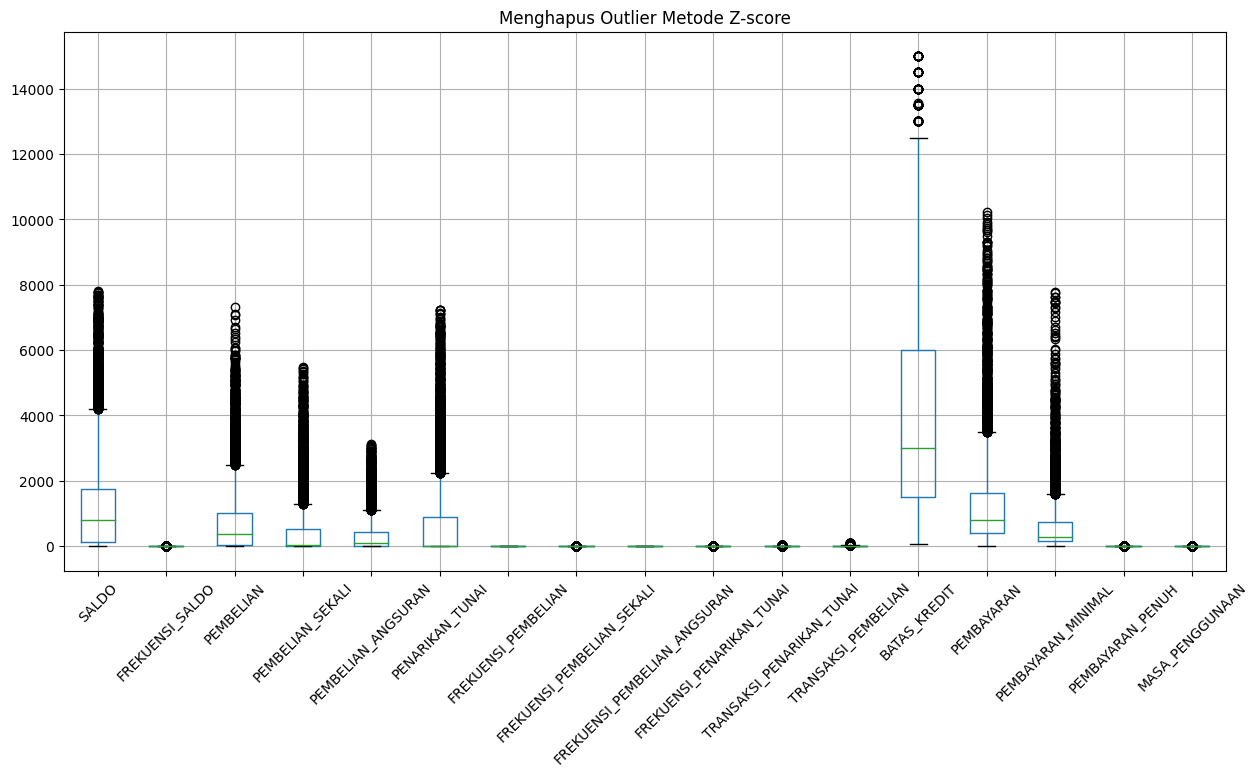

In [28]:
plt.figure(figsize=(15, 7))
data_zsc.boxplot()
plt.title('Menghapus Outlier Metode Z-score')
plt.xticks(rotation=45)
plt.show()

In [29]:
print("Data frame Sebelum Outlier di hapus menggunakan metode ZScore: ", data.shape)
print("Data frame Sesudah Outlier di hapus menggunakan metode ZScore: ", data_zsc.shape)

Data frame Sebelum Outlier di hapus menggunakan metode ZScore:  (8950, 17)
Data frame Sesudah Outlier di hapus menggunakan metode ZScore:  (7434, 17)


In [30]:
# Jumlah baris sebelum dan sesudah outlier dihapus
jumlah_sebelum = 8950
jumlah_sesudah = 7434

# Menghitung selisih jumlah baris dan persentase terhapus
selisih = jumlah_sebelum - jumlah_sesudah
persentase_terhapus = (selisih / jumlah_sebelum) * 100

# Menampilkan hasil
print(f"Selisih jumlah baris: {selisih}")
print(f"Persentase data yang terhapus: {persentase_terhapus:.2f}%")

Selisih jumlah baris: 1516
Persentase data yang terhapus: 16.94%


Dikarenakan presentase z-score lebih rendah, kita memilih untuk menggunakan metode ini. Z-score merupakan metode statistik yang mengukur seberapa jauh sebuah nilai dari rata-rata dalam satuan deviasi standar. Pemilihan metode ini didasarkan pada pertimbangan untuk mendeteksi outlier, dan kita cenderung memilih nilai z-score yang lebih rendah sebagai indikasi bahwa suatu data lebih dekat ke nilai rata-rata atau nilai yang dianggap normal. Persentase yang lebih kecil dalam hal ini diartikan sebagai sebagian kecil data yang dianggap sebagai outlier atau jauh dari nilai rata-rata, dan oleh karena itu kita memilih metode yang menghasilkan presentase z-score yang lebih rendah untuk mempertahankan sebagian besar data dalam analisis kita.

Central Tendency merupakan nilai yang menunjukkan pusat dari suatu kumpulan data dan memberikan gambaran tentang di mana mayoritas nilai data berkumpul dalam distribusi. Mean, Median, dan Modus adalah ukuran pusat yang sering digunakan dalam menganalisis dataset.

Sementara itu, Measures of Spread digunakan untuk menggambarkan sejauh mana data kita tersebar. Ini membantu memberikan wawasan tentang variasi dan dispersi data. Beberapa metode yang umum digunakan untuk mengukur sebaran data termasuk range, varian, dan standar deviasi.

Dalam proyek ini, kami fokus pada kolom-kolom dengan tipe data float untuk menjalankan analisis Central Tendency dan Measures of Spread. Pendekatan ini memungkinkan kami untuk memahami dengan lebih baik bagaimana data tersebar dan di mana titik pusatnya

### 5.4 Cardinality

Kardinalitas, atau sering disebut cardinality, adalah ukuran keunikan data pada suatu kolom tertentu dalam sebuah tabel database. Kardinalitas mencerminkan jumlah nilai unik yang dimiliki oleh kolom tersebut. Tujuan utama dalam mengelola kardinalitas adalah untuk menguranginya, sehingga model yang dibangun menjadi lebih konsisten dan tidak mengalami over-fit.Dengan mengurangi kardinalitas, kita dapat memastikan bahwa model melihat dan memahami sebanyak mungkin label unik selama proses pelatihan.

In [33]:
print("Jumlah kategori dalam variabel adalah:")
data[data.columns].nunique()

Jumlah kategori dalam variabel adalah:


SALDO                           8871
FREKUENSI_SALDO                   43
PEMBELIAN                       6203
PEMBELIAN_SEKALI                4014
PEMBELIAN_ANGSURAN              4452
PENARIKAN_TUNAI                 4323
FREKUENSI_PEMBELIAN               47
FREKUENSI_PEMBELIAN_SEKALI        47
FREKUENSI_PEMBELIAN_ANGSURAN      47
FREKUENSI_PENARIKAN_TUNAI         54
TRANSAKSI_PENARIKAN_TUNAI         65
TRANSAKSI_PEMBELIAN              173
BATAS_KREDIT                     206
PEMBAYARAN                      8711
PEMBAYARAN_MINIMAL              8637
PEMBAYARAN_PENUH                  47
MASA_PENGGUNAAN                    7
dtype: int64

Dapat diamati bahwa jumlah kategori (nilai unik) pada berbagai fitur sangat banyak, atau dikenal dengan istilah high cardinality. Meskipun termasuk dalam high cardinality, pengurangan cardinality tidak dapat dilakukan karena variasi pelanggan dalam melakukan transaksi sangat beragam. Kesimpulan ini menunjukkan bahwa data memiliki keberagaman yang signifikan dalam pola dan karakteristik pelanggan yang bertransaksi dengan kartu kredit.

## **6. Data Preprocessing** (Transformasi Data dengan Standarisasi menggunakan Scaler)




Standarisasi atau normalisasi data adalah suatu teknik yang digunakan untuk mengatur skala data setiap fitur agar memiliki nilai yang seragam. Dalam konteks proyek ini, kami menggunakan Standar Scaler, suatu metode standarisasi, yang mengubah nilai setiap fitur sehingga berada dalam rentang tertentu, khususnya antara 0 hingga 1. Tujuan dari proses ini adalah untuk memastikan bahwa semua fitur memiliki skala yang seragam, sehingga model dapat memahami dan mempelajari pola data dengan baik tanpa adanya pengaruh skala yang berbeda di antara fitur-fitur tersebut.

In [34]:
# Standarisasi data menggunakan Standard Scaler
scaler = StandardScaler()

# Transformasi data menggunakan Standard Scaler pada data_zsc
scaled = scaler.fit_transform(data_zsc)

# Menampilkan ukuran data sebelum dan setelah di-scaling
print("Ukuran Data Awal:")
print(data_zsc.shape)
print("\nUkuran Data Setelah di-Scaling:")
print(scaled.shape)

Ukuran Data Awal:
(7434, 17)

Ukuran Data Setelah di-Scaling:
(7434, 17)


In [35]:
# Statistik dari data yang telah di-scaling
statistics_scaled_data = pd.DataFrame(scaled, columns=data_zsc.columns)
statistics_scaled_data.head()

,SALDO,FREKUENSI_SALDO,PEMBELIAN,PEMBELIAN_SEKALI,PEMBELIAN_ANGSURAN,PENARIKAN_TUNAI,FREKUENSI_PEMBELIAN,FREKUENSI_PEMBELIAN_SEKALI,FREKUENSI_PEMBELIAN_ANGSURAN,FREKUENSI_PENARIKAN_TUNAI,TRANSAKSI_PENARIKAN_TUNAI,TRANSAKSI_PEMBELIAN,BATAS_KREDIT,PEMBAYARAN,PEMBAYARAN_MINIMAL,PEMBAYARAN_PENUH,MASA_PENGGUNAAN
0,-0.809652,-0.334911,-0.641448,-0.543505,-0.448067,-0.543984,-0.805098,-0.668791,-0.698321,-0.690806,-0.587319,-0.665235,-1.021765,-0.762853,-0.577804,-0.531523,0.312187
1,1.273272,0.091127,-0.734487,-0.543505,-0.636612,4.671914,-1.225631,-0.668791,-0.910579,0.883825,0.427706,-0.797517,1.022039,1.953121,0.623747,0.232637,0.312187
2,0.807271,0.517164,0.019551,0.430864,-0.636612,-0.543984,1.297564,2.808268,-0.910579,-0.690806,-0.587319,-0.003826,1.192356,-0.470272,0.050485,-0.531523,0.312187
3,0.261448,-1.186986,0.727420,1.345575,-0.636612,-0.377388,-1.015366,-0.379037,-0.910579,-0.165931,-0.333563,-0.731376,1.192356,-0.903344,0.355657,-0.531523,0.312187
4,-0.297867,0.517164,-0.718883,-0.523341,-0.636612,-0.543984,-1.015366,-0.379037,-0.910579,-0.690806,-0.587319,-0.731376,-0.953638,-0.431099,-0.442194,-0.531523,0.312187


In [36]:
# Menyimpan hasil standarisasi ke dalam dataframe baru
scaled_data = pd.DataFrame(scaled, columns=data_zsc.columns)

# Memilih beberapa kolom untuk dilihat perbedaannya
selected_columns = ['SALDO', 'PEMBELIAN', 'TRANSAKSI_PENARIKAN_TUNAI']

# Menampilkan nilai sebelum standarisasi
print("Sebelum Standarisasi:")
print(data_zsc[selected_columns].head())

# Menampilkan nilai setelah standarisasi
print("\nSetelah Standarisasi:")
print(scaled_data[selected_columns].head())

Sebelum Standarisasi:
         SALDO  PEMBELIAN  TRANSAKSI_PENARIKAN_TUNAI
0    40.900749      95.40                          0
1  3202.467416       0.00                          4
2  2495.148862     773.17                          0
3  1666.670542    1499.00                          1
4   817.714335      16.00                          0

Setelah Standarisasi:
      SALDO  PEMBELIAN  TRANSAKSI_PENARIKAN_TUNAI
0 -0.809652  -0.641448                  -0.587319
1  1.273272  -0.734487                   0.427706
2  0.807271   0.019551                  -0.587319
3  0.261448   0.727420                  -0.333563
4 -0.297867  -0.718883                  -0.587319



Kesimpulan secara umum:
Sebelum standarisasi, nilai-nilai dalam setiap kolom memiliki skala yang berbeda-beda, artinya variabilitas datanya cukup tinggi.
Setelah standarisasi, nilai-nilai dalam setiap kolom telah disesuaikan sehingga memiliki rata-rata yang mendekati 0 dan deviasi standar mendekati 1, sehingga skala datanya menjadi seragam.

## **7. Pendefinisian Model** (K-Means Clustering)

Mengapa Memilih K-Means Clustering:
*   K-Means Clustering adalah algoritma unsupervised learning yang digunakan untuk mengelompokkan data ke dalam beberapa cluster berdasarkan kesamaan fitur. Mungkin pilihan ini diambil karena tujuan awal adalah menemukan pola atau struktur dalam data tanpa adanya label.
*   K-Means cocok untuk tugas-tugas clustering di mana data tidak memiliki label dan tujuan utamanya adalah mengelompokkan data ke dalam cluster berdasarkan kemiripan karakteristik.Jika terdapat pola kelompok atau segmen yang alami dalam data dan kita ingin mengidentifikasinya tanpa adanya label, K-Means Clustering bisa menjadi pilihan yang baik.








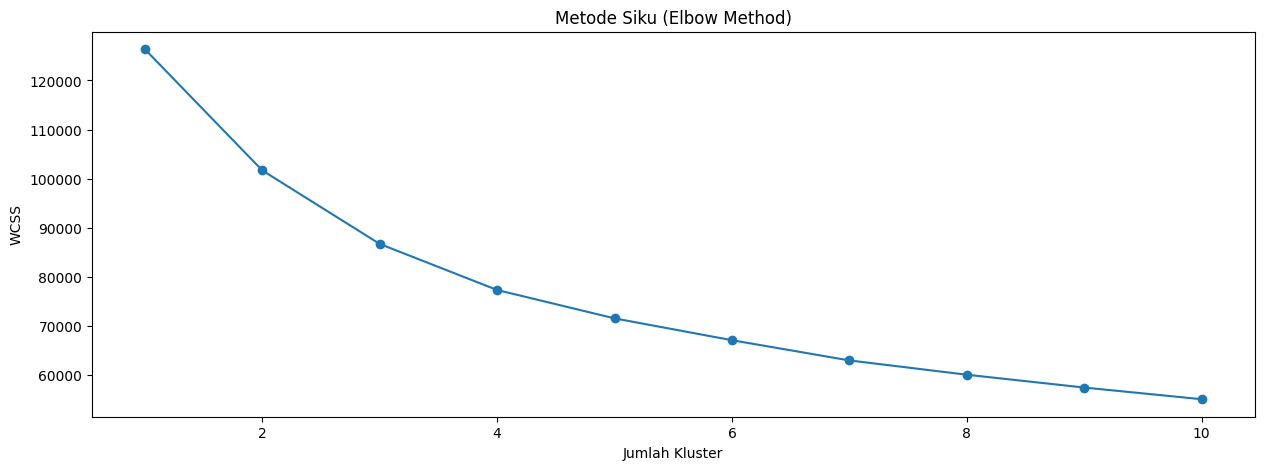

In [37]:
# Inisialisasi list untuk menyimpan nilai WCSS (Within-Cluster Sum of Squares)
wcss = []

# Iterasi untuk mencoba berbagai jumlah kluster dari 1 hingga 10
for i in range(1, 11):
    # Membuat objek KMeans dengan jumlah kluster sesuai iterasi
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    # Melatih model KMeans dengan data yang telah discaling
    kmeans.fit(scaled_data)
    # Menyimpan nilai WCSS dari model yang dilatih ke dalam list
    wcss.append(kmeans.inertia_)

# Membuat plot untuk metode elbow
plt.figure(figsize=(15, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Metode Siku (Elbow Method)')
plt.xlabel('Jumlah Kluster')
plt.ylabel('WCSS')
plt.show()


Metode Elbow (elbow method) adalah suatu pendekatan yang digunakan dalam analisis kluster (clustering) untuk menentukan jumlah kluster yang optimal untuk suatu dataset.

In [38]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Iterasi untuk mencoba jumlah kluster dari 2 hingga 7
for i in range(2, 8):
    # Membuat model KMeans
    km = KMeans(n_clusters=i, random_state=0)
    # Menetapkan label kluster untuk setiap data
    labels = km.fit_predict(scaled_data)
    # Menghitung silhouette score
    score = silhouette_score(scaled_data, labels)
    # Menampilkan silhouette score untuk jumlah kluster tertentu
    print(f"Silhouette score untuk {i} kluster: {score:.3f}")

Silhouette score untuk 2 kluster: 0.206
Silhouette score untuk 3 kluster: 0.207
Silhouette score untuk 4 kluster: 0.184
Silhouette score untuk 5 kluster: 0.184
Silhouette score untuk 6 kluster: 0.191
Silhouette score untuk 7 kluster: 0.199


 Metode silhouette score digunakan untuk mengevaluasi performa KMeans clustering dengan berbagai jumlah kluster. Silhouette score mengukur seberapa baik objek dalam satu kluster berkumpul bersama dan seberapa terpisah kluster satu sama lain.

Silhouette score berkisar dari -1 hingga 1. Nilai positif menunjukkan bahwa objek dalam kluster lebih dekat satu sama lain daripada dengan kluster lain. Nilai yang lebih tinggi menunjukkan pembagian kluster yang lebih baik.

Oleh karena itu kita akan menggunakan 3 cluster

In [39]:
# Menentukan kluster untuk setiap data menggunakan algoritma KMeans dengan 3 kluster
x = scaled_data.values
km = KMeans(n_clusters=3, random_state=42)
y_km = km.fit_predict(x)
y_km

array([2, 0, 1, ..., 2, 2, 2], dtype=int32)

In [40]:
# Membuat salinan data standarisasi dan menambahkan kolom dengan label kluster dari KMeans
data_kmean= scaled_data.copy()
data_kmean['KMeansSegment']= km.labels_

In [41]:
# Menambahkan kolom baru bernama 'Labels' dibuat berdasarkan mapping dari nilai pada kolom 'KMeansSegment' ke label-label yang lebih deskriptif.
data_kmean['Labels'] = data_kmean['KMeansSegment'].map({0:'limit kredit rendah & jarang memperbaharui isi saldo',
                                                    1:'limit kredit rata-rata & cukup sering memperbaharui isi saldo',
                                                    2:'limit kredit tinggi & sering memperbaharui isi saldo'})
data_kmean.head()

,SALDO,FREKUENSI_SALDO,PEMBELIAN,PEMBELIAN_SEKALI,PEMBELIAN_ANGSURAN,PENARIKAN_TUNAI,FREKUENSI_PEMBELIAN,FREKUENSI_PEMBELIAN_SEKALI,FREKUENSI_PEMBELIAN_ANGSURAN,FREKUENSI_PENARIKAN_TUNAI,TRANSAKSI_PENARIKAN_TUNAI,TRANSAKSI_PEMBELIAN,BATAS_KREDIT,PEMBAYARAN,PEMBAYARAN_MINIMAL,PEMBAYARAN_PENUH,MASA_PENGGUNAAN,KMeansSegment,Labels
0,-0.809652,-0.334911,-0.641448,-0.543505,-0.448067,-0.543984,-0.805098,-0.668791,-0.698321,-0.690806,-0.587319,-0.665235,-1.021765,-0.762853,-0.577804,-0.531523,0.312187,2,limit kredit tinggi & sering memperbaharui isi...
1,1.273272,0.091127,-0.734487,-0.543505,-0.636612,4.671914,-1.225631,-0.668791,-0.910579,0.883825,0.427706,-0.797517,1.022039,1.953121,0.623747,0.232637,0.312187,0,limit kredit rendah & jarang memperbaharui isi...
2,0.807271,0.517164,0.019551,0.430864,-0.636612,-0.543984,1.297564,2.808268,-0.910579,-0.690806,-0.587319,-0.003826,1.192356,-0.470272,0.050485,-0.531523,0.312187,1,limit kredit rata-rata & cukup sering memperba...
3,0.261448,-1.186986,0.727420,1.345575,-0.636612,-0.377388,-1.015366,-0.379037,-0.910579,-0.165931,-0.333563,-0.731376,1.192356,-0.903344,0.355657,-0.531523,0.312187,2,limit kredit tinggi & sering memperbaharui isi...
4,-0.297867,0.517164,-0.718883,-0.523341,-0.636612,-0.543984,-1.015366,-0.379037,-0.910579,-0.690806,-0.587319,-0.731376,-0.953638,-0.431099,-0.442194,-0.531523,0.312187,2,limit kredit tinggi & sering memperbaharui isi...


In [42]:
# Melihat persentase dari masing-masing klaster
clust = pd.DataFrame({"Klaster":(data_kmean['Labels'].unique()),
                        "Percent":(data_kmean['Labels'].value_counts()/data_kmean.shape[0])*100}).reset_index()

#Menghapus kolom 'index' dari DataFrame yang mungkin muncul sebagai kolom tambahan.
clust.drop(['index'],axis=1)


,Klaster,Percent
0,limit kredit tinggi & sering memperbaharui isi...,56.241593
1,limit kredit rendah & jarang memperbaharui isi...,24.092010
2,limit kredit rata-rata & cukup sering memperba...,19.666398


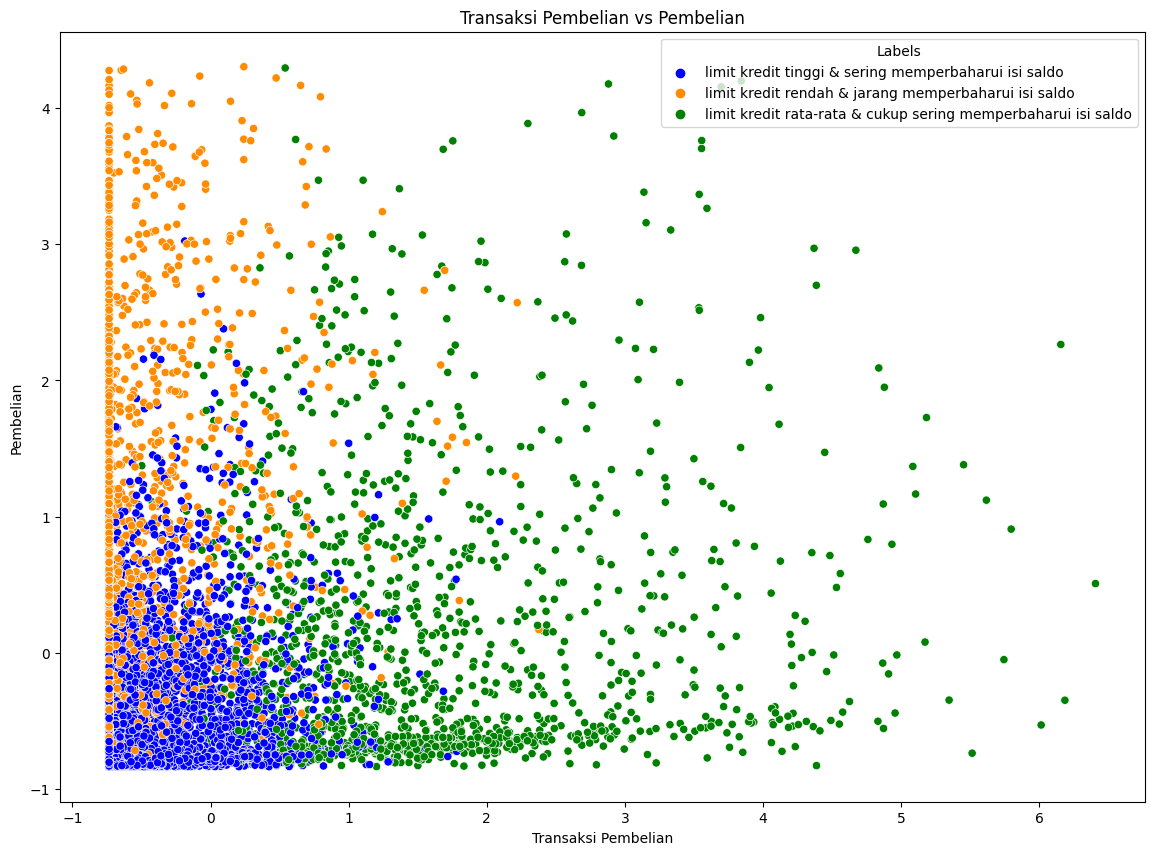

In [43]:
# Memvisualisasikan hasil clustering
plt.figure(figsize=(14, 10))
X = data_kmean['PEMBELIAN']
Y = data_kmean['SALDO']
g = sns.scatterplot(x=X, y=Y, hue=data_kmean['Labels'], palette=['blue', 'darkorange', 'green'])
g.set_xlabel('Transaksi Pembelian')
g.set_ylabel('Pembelian')
g.set_title('Transaksi Pembelian vs Pembelian')
plt.show()

Analisis data menggunakan K-Means Clustering pada dataset ini berhasil membagi pengguna kartu kredit menjadi tiga klaster utama berdasarkan karakteristik dan perilaku transaksinya. Klaster pertama, yang menyumbang sekitar 56.24% dari total data, terdiri dari pengguna dengan limit kredit tinggi yang sering memperbaharui isi saldo. Sementara itu, klaster kedua, dengan kontribusi sekitar 24.09%, mencakup pengguna dengan limit kredit rendah yang jarang memperbaharui isi saldo. Klaster ketiga, terdiri dari sekitar 19.67% dari total data, menunjukkan pengguna dengan limit kredit rata-rata yang cukup sering melakukan pembaharuan isi saldo. Keseluruhan, hasil klastering ini memberikan pemahaman yang lebih baik mengenai pola dan karakteristik pengguna kartu kredit dalam kelompok tertentu, memungkinkan pihak terkait untuk merancang strategi pemasaran atau layanan yang lebih sesuai dengan kebutuhan masing-masing klaster.







## **8. Pelatihan Model**

### Principal Component Analysis
> Principal Component Analysis (PCA) adalah sebuah teknik analisis dan transformasi yang digunakan untuk mengurangi dimensi dari data dengan tetap mempertahankan sebagian besar informasi. Tujuan utama dari PCA adalah untuk mengidentifikasi pola-pola dalam data, memproyeksikan data ke ruang yang lebih rendah dimensi (komponen utama), dan memahami variabilitas yang terkandung dalam data.



In [44]:
# Import modul PCA dari library sklearn
from sklearn.decomposition import PCA

# Inisialisasi objek PCA dengan jumlah komponen utama (n_components) sebanyak 2
# dan nilai random_state untuk reproduktibilitas
pca = PCA(n_components=2, random_state=42)

# Melakukan fitting dan transformasi data yang telah di-standarisasi menggunakan PCA
pca_scaled = pca.fit(scaled)

In [45]:
# Membuat nama kolom untuk dataframe hasil transformasi PCA
pc_columns = ['PC'+str(n) for n in range(1, len(pca_scaled.components_)+1)]

# Menggunakan metode transform untuk mengubah data yang telah di-standarisasi menggunakan PCA
# Menyimpan hasil transformasi dalam DataFrame baru dengan nama kolom yang telah dibuat sebelumnya
data_pca = pd.DataFrame(pca_scaled.transform(scaled), columns=pc_columns)
data_pca['KMeansSegment']= km.labels_
data_pca

,PC1,PC2,KMeansSegment
0,-1.325625,-2.046626,2
1,-2.781074,3.311279,0
2,1.237429,0.544760,1
3,-0.606674,-0.007237,2
4,-1.448065,-1.469047,2
...,...,...,...
7429,-0.978992,-1.327685,2
7430,-0.191682,-2.221450,2
7431,-2.574731,-1.140534,2
7432,-0.116639,-1.954584,2


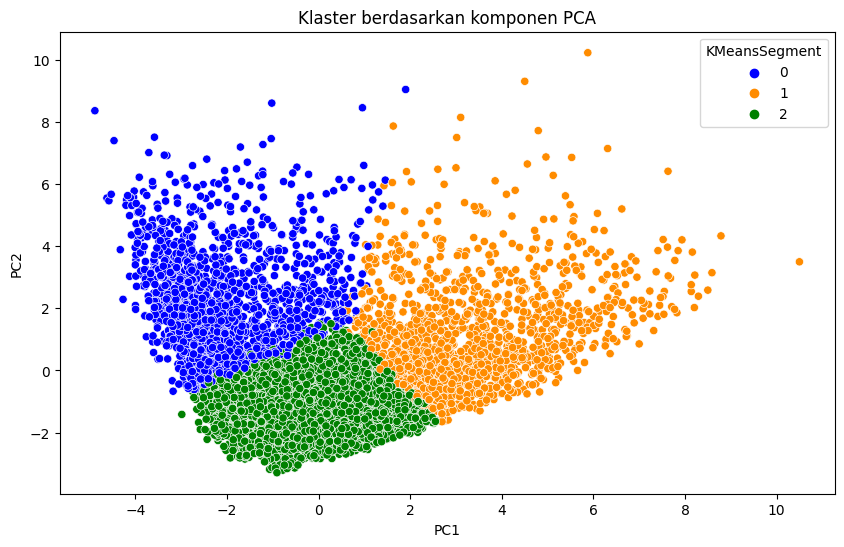

In [46]:
# Menentukan sumbu X dan Y dari DataFrame hasil transformasi PCA
x_axis = data_pca['PC1']
y_axis = data_pca['PC2']

# Membuat plot scatter menggunakan seaborn, dengan warna berdasarkan label klaster
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_axis, y=y_axis, hue=data_pca['KMeansSegment'], palette=['blue', 'darkorange', 'green'])

# Menambahkan judul plot
plt.title('Klaster berdasarkan komponen PCA')

# Menampilkan plot
plt.show()

Setelah melalui berbagai analisis dan proses pemrosesan data, hasilnya menunjukkan bahwa data dapat dikelompokkan menjadi tiga klaster dengan karakteristik masing-masing. Klaster tersebut dapat diidentifikasi berdasarkan warna pada scatter plot:

*   Klaster Biru (Cluster 0): Klaster ini
mencirikan pengguna dengan limit kredit rendah dan kecenderungan untuk jarang memperbaharui isi saldo mereka.
*   Klaster Orange (Cluster 1): Klaster ini mencirikan pengguna dengan limit kredit rata-rata dan kecenderungan untuk cukup sering memperbaharui isi saldo mereka.
*   Klaster Hijau (Cluster 2): Klaster ini mencirikan pengguna dengan limit kredit tinggi dan kecenderungan untuk sering memperbaharui isi saldo mereka.

Dengan melihat distribusi data pada scatter plot, dapat terlihat perbedaan karakteristik antara klaster-klaster tersebut.

## **9. Evaluasi Model**

Mengevaluasi performa model

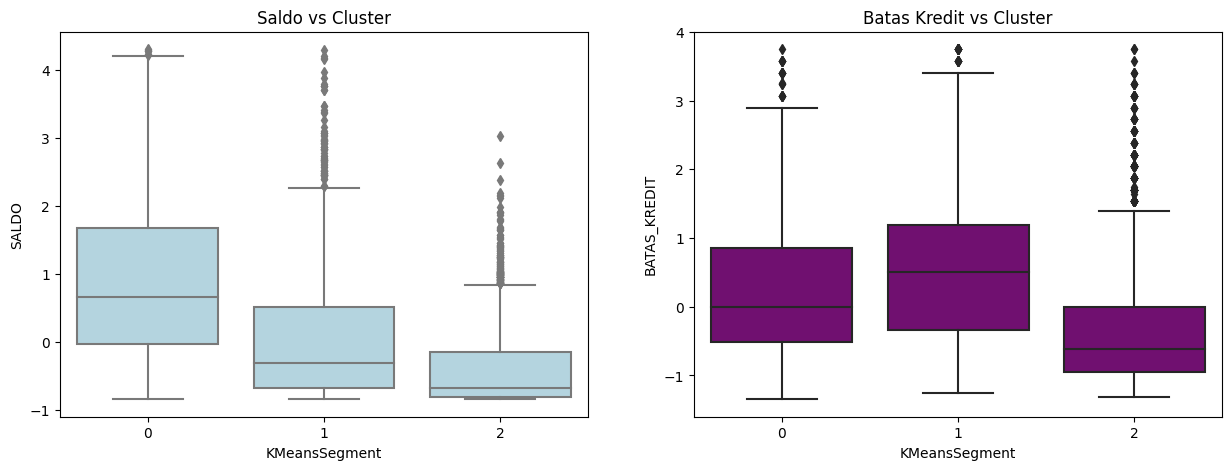

In [47]:
# Membuat dua subplot dalam satu baris dengan dua kolom, menggunakan objek axes (fig, ax)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Subplot pertama: Boxplot untuk "SALDO" terhadap "KMeansSegment"
plt.subplot(1, 2, 1)
sns.boxplot(x="KMeansSegment", y="SALDO", data=data_kmean, color="lightblue")
plt.title("Saldo vs Cluster")  # Memberikan judul pada subplot pertama

# Subplot kedua: Boxplot untuk "BATAS_KREDIT" terhadap "KMeansSegment"
plt.subplot(1, 2, 2)
sns.boxplot(x="KMeansSegment", y="BATAS_KREDIT", data=data_kmean, color="purple")
plt.title("Batas Kredit vs Cluster")  # Memberikan judul pada subplot kedua

# Menampilkan plot
plt.show()

Berdasarkan visualisai tersebut dapat diambil kesimpulan :

*   Boxplot Saldo vs Cluster
> Boxplot ini menunjukkan distribusi saldo untuk tiga segmen KMeans: 0, 1, dan 2. Segmen KMeans 0 memiliki rentang saldo terbesar, yang mungkin menunjukkan bahwa pengguna dengan limit kredit rendah dan jarang memperbaharui isi saldo memiliki variasi saldo yang lebih besar. Sementara itu, segmen KMeans 1 dan 2 memiliki rentang saldo yang lebih sempit dengan median yang lebih rendah dibandingkan segmen KMeans 0. Ini mungkin menunjukkan bahwa pengguna dengan limit kredit rata-rata dan tinggi cenderung memiliki saldo yang lebih stabil.

*   Boxplot Batas Kredit vs Cluster
> Boxplot ini menunjukkan distribusi batas kredit untuk tiga segmen KMeans: 0, 1, dan 2. Segmen KMeans 2 memiliki median batas kredit tertinggi, yang sesuai dengan definisi bahwa segmen ini mewakili pengguna dengan limit kredit tinggi dan sering memperbaharui isi saldo. Segmen KMeans 0 dan 1 memiliki median batas kredit yang lebih rendah dengan beberapa outlier pada segmen KMeans 1.




## **10. Model Inference**

In [48]:
from sklearn.preprocessing import StandardScaler
# Masukkan nilai input pengguna ke dalam variabel
SALDO = float(input('SALDO: '))
FREKUENSI_SALDO = float(input('FREKUENSI_SALDO: '))
PEMBELIAN = float(input('PEMBELIAN: '))
PEMBELIAN_SEKALI = float(input('PEMBELIAN_SEKALI: '))
PEMBELIAN_ANGSURAN = float(input('PEMBELIAN_ANGSURAN: '))
PENARIKAN_TUNAI = float(input('PENARIKAN_TUNAI: '))
FREKUENSI_PEMBELIAN = float(input('FREKUENSI_PEMBELIAN: '))
FREKUENSI_PEMBELIAN_SEKALI = float(input('FREKUENSI_PEMBELIAN_SEKALI: '))
FREKUENSI_PEMBELIAN_ANGSURAN = float(input('FREKUENSI_PEMBELIAN_ANGSURAN: '))
FREKUENSI_PENARIKAN_TUNAI = float(input('FREKUENSI_PENARIKAN_TUNAI: '))
TRANSAKSI_PENARIKAN_TUNAI = float(input('TRANSAKSI_PENARIKAN_TUNAI: '))
TRANSAKSI_PEMBELIAN = float(input('TRANSAKSI_PEMBELIAN: '))
BATAS_KREDIT = float(input('BATAS_KREDIT: '))
PEMBAYARAN = float(input('PEMBAYARAN: '))
PEMBAYARAN_MINIMAL = float(input('PEMBAYARAN_MINIMAL: '))
PEMBAYARAN_PENUH = float(input('PEMBAYARAN_PENUH: '))
MASA_PENGGUNAAN = float(input('MASA_PENGGUNAAN: '))

# Membuat list dari input pengguna
feature = [SALDO, FREKUENSI_SALDO, PEMBELIAN, PEMBELIAN_SEKALI, PEMBELIAN_ANGSURAN, PENARIKAN_TUNAI, FREKUENSI_PEMBELIAN, FREKUENSI_PEMBELIAN_SEKALI, FREKUENSI_PEMBELIAN_ANGSURAN, FREKUENSI_PENARIKAN_TUNAI, TRANSAKSI_PENARIKAN_TUNAI, TRANSAKSI_PEMBELIAN, BATAS_KREDIT,
          PEMBAYARAN, PEMBAYARAN_MINIMAL, PEMBAYARAN_PENUH, MASA_PENGGUNAAN]
# Melakukan inisialisasi StandardScaler
sc = StandardScaler()
# Melakukan fit dan transform pada fitur
feature = sc.fit_transform([feature])
# Melakukan prediksi kluster
predict = km.predict(feature)

# Menampilkan hasil prediksi kluster
if predict == 0:
    print('Berdasarkan analisis, pengguna masuk ke dalam Cluster 0')
elif predict == 1:
    print('Berdasarkan analisis, pengguna masuk ke dalam Cluster 1')
elif predict == 2:
    print('Berdasarkan analisis, pengguna masuk ke dalam Cluster 2')


SALDO: 40.9
FREKUENSI_SALDO: 0.8
PEMBELIAN: 95.4
PEMBELIAN_SEKALI: 0
PEMBELIAN_ANGSURAN: 95.4
PENARIKAN_TUNAI: 0
FREKUENSI_PEMBELIAN: 0.167
FREKUENSI_PEMBELIAN_SEKALI: 0
FREKUENSI_PEMBELIAN_ANGSURAN: 0.083
FREKUENSI_PENARIKAN_TUNAI: 0
TRANSAKSI_PENARIKAN_TUNAI: 0
TRANSAKSI_PEMBELIAN: 2
BATAS_KREDIT: 1000
PEMBAYARAN: 201
PEMBAYARAN_MINIMAL: 139
PEMBAYARAN_PENUH: 0
MASA_PENGGUNAAN: 12
Berdasarkan analisis, pengguna masuk ke dalam Cluster 2


Model menganalisis setiap kolom yang diinputkan dan mengklasifikasikan bahwa contoh pengguna tersebut masuk ke Cluster 2

## **11. Pengambilan Kesimpulan**

Setelah melalui semua proses, dapat disimpulkan :


1.   Korelasi antar atributnya sebagian besar memiliki korelasi sedang dan rendah. Sedangkan untuk korelasi tinggi hanya beberapa yaitu pembelian_sekali dengan pembelian, frekuensi_pembelian_angsuran dengan frekuensi_pembelian dan transaksi_penarikan_tunai dengan frekuensi_penarikan_tunai.

*   Pembelian Sekali dengan Pembelian: Korelasi yang kuat antara “pembelian_sekali” dengan “pembelian” dapat dijelaskan karena jumlah pembelian maksimum dalam satu kali transaksi tentu akan berkorelasi dengan jumlah total pembelian; semakin besar pembelian sekali, semakin besar total pembeliannya.
*   Frekuensi Pembelian Angsuran dengan Frekuensi Pembelian: Korelasi yang tinggi antara “frekuensi_pembelian_angsuran” dengan “frekuensi_pembelian” dapat dijelaskan karena frekuensi pembayaran angsuran cenderung meningkat seiring dengan peningkatan frekuensi pembelian secara keseluruhan.

*   Transaksi Penarikan Tunai dengan Frekuensi Penarikan Tunai: Korelasi yang kuat antara “transaksi_penarikan_tunai” dengan “frekuensi_penarikan_tunai” dapat dijelaskan karena semakin sering pencairan tunai dibayarkan, jumlah transaksi penarikan tunai juga akan meningkat.

Secara umum, korelasi yang kuat antara variabel-variabel ini menunjukkan bahwa perilaku pembelian dan penarikan tunai pelanggan cenderung konsisten; jika mereka sering melakukan pembelian atau penarikan tunai, mereka juga cenderung melakukan transaksi dengan jumlah yang lebih besar.


2.   Pesebaran data cukup beragam dan banyak ditemukan outlier sehingga perlu ada aksi khusu untuk menghapus outlier yaitu ZScore

3.   Seluruh proses yang kita lakukan untuk mendapatkan model merupakan implementasi dari algoritma unsupervised learning dengan metode k-means. Untuk mencari jumlah klaster optimal kami menggunakan teknik Silhouette Score dan Elbow Method. Hasilnya menunjukkan bahwa jumlah klaster paling optimal adalah tiga. Setelah melalui berbagai analisis dan teknik pemrosesan, data berhasil dikelompokkan menjadi tiga klaster. Ketiga klaster tersebut memiliki kriteria yang berbeda, yaitu berdasarkan limit kredit (rendah, rata-rata, tinggi) dan frekuensi pengisian saldo.

*   Klaster 0: limit kredit pengguna rendah dan  sangat jarang memperbaharui isi saldo
*   Klaster 1: limit kredit pengguna rata-rata dan cukup sering memperbaharui isi saldo
*   Klaster 2: limit kredit pengguna tinggi dan  sering memperbaharui isi saldo.

Segmentasi ini memungkinkan penawaran layanan yang lebih disesuaikan dengan kebutuhan spesifik setiap segmen, meningkatkan efisiensi pemasaran dan kepuasan pelanggan. Contoh dari penawarannya dapat berupa :

*   Klaster Limit Kredit Rendah & Jarang Memperbaharui Isi Saldo: Pelanggan dalam klaster ini mungkin lebih sensitif terhadap harga dan lebih berhati-hati dalam pengeluaran mereka. Oleh karena itu, penawaran atau promosi yang menekankan nilai dan efisiensi dapat menarik bagi mereka. Misalnya, program loyalitas yang memberikan diskon atau cashback untuk pembelian tertentu bisa menjadi pilihan yang baik.

*   Klaster Limit Kredit Rata-rata & Cukup Sering Memperbaharui Isi Saldo: Pelanggan dalam klaster ini mungkin memiliki kebutuhan yang beragam dan bersedia untuk menghabiskan lebih banyak. Oleh karena itu, penawaran yang menekankan variasi dan fleksibilitas dapat menarik bagi mereka. Misalnya, paket layanan yang dapat disesuaikan atau penawaran bundling produk bisa menjadi pilihan yang baik.

*   Klaster Limit Kredit Tinggi & Sering Memperbaharui Isi Saldo: Pelanggan dalam klaster ini mungkin adalah pengguna berat yang menghargai kenyamanan dan layanan premium. Oleh karena itu, penawaran yang menekankan layanan premium, akses eksklusif, atau pengalaman yang superior dapat menarik bagi mereka. Misalnya, layanan prioritas atau penawaran eksklusif untuk produk atau layanan baru bisa menjadi pilihan yang baik.









